#**201955718 - MELIA PUTRI H - 머신러닝 Assignment 3 (APPLIED)**
From the textbook ***“Introduction to Statistical Learning”*** by Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani
1. **No.10 Page 186 PDF (171 Physical Book): Weekly Dataset**
2. **No.11 Page 186-187 PDF (171-172 Physical Book): Auto Dataset**

**(Conceptual: No. 4, 6)**




###**0. Importing the Libraries**

In [ ]:
#Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**1. Problem No.10 Page 186 PDF (171 Physical Book): Weekly Dataset**

This question should be answered using the `Weekly` data set, which is part of the `ISLR` package. This contains 1,089 weekly stock market returns for 21 years, from the beginning of 1990 to the end of 2010.

**Attributes:**
* `Year` : the year that the observation was recorded
* `Lag1` : percentage return for previous week
* `Lag2` : percentage return for 2 weeks previous
* `Lag3` : percentage return for 3 weeks previous
* `Lag4` : percentage return for 4 weeks previous
* `Lag5` : percentage return for 5 weeks previous
* `Volume` : volume of shares traded (average number of daily shares traded in billions)
* `Today` : percentage return for this week
* `Direction` : a factor with levels down and up indicating whether the market had a positive or negative return on a given week

#####**Processing the Dataset**

In the section, I will retrive the data from the internet, from the link that is put in the cell below:

In [ ]:
#Importing the Data Set
weekly_url="https://raw.githubusercontent.com/selva86/datasets/master/Weekly.csv"
weekly=pd.read_csv(weekly_url,na_values='?')

#Checking Missing Values
weekly.isnull().sum()

Year         0
Lag1         0
Lag2         0
Lag3         0
Lag4         0
Lag5         0
Volume       0
Today        0
Direction    0
dtype: int64

In [ ]:
#Showing the Data Set
weekly['Direction2']=weekly.Direction.factorize()[0]
weekly

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction2
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1
...,...,...,...,...,...,...,...,...,...,...
1084,2010,-0.861,0.043,-2.173,3.599,0.015,3.205160,2.969,Up,1
1085,2010,2.969,-0.861,0.043,-2.173,3.599,4.242568,1.281,Up,1
1086,2010,1.281,2.969,-0.861,0.043,-2.173,4.835082,0.283,Up,1
1087,2010,0.283,1.281,2.969,-0.861,0.043,4.454044,1.034,Up,1


#####**(a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?**

In [ ]:
#Statistical Summary of Weekly Data Set
weekly.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1089.0,2000.048669,6.033182,1990.000000,1995.000000,2000.00000,2005.000000,2010.000000
Lag1,1089.0,0.150585,2.357013,-18.195000,-1.154000,0.24100,1.405000,12.026000
Lag2,1089.0,0.151079,2.357254,-18.195000,-1.154000,0.24100,1.409000,12.026000
Lag3,1089.0,0.147205,2.360502,-18.195000,-1.158000,0.24100,1.409000,12.026000
Lag4,1089.0,0.145818,2.360279,-18.195000,-1.158000,0.23800,1.409000,12.026000
Lag5,1089.0,0.139893,2.361285,-18.195000,-1.166000,0.23400,1.405000,12.026000
Volume,1089.0,1.574618,1.686636,0.087465,0.332022,1.00268,2.053727,9.328214
Today,1089.0,0.149899,2.356927,-18.195000,-1.154000,0.24100,1.405000,12.026000
Direction2,1089.0,0.555556,0.497132,0.000000,0.000000,1.00000,1.000000,1.000000


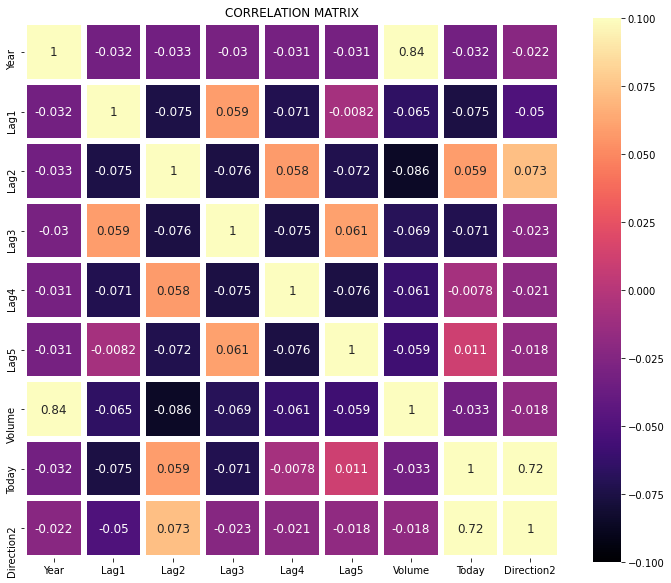

In [ ]:
#Correlation Matrix
weeklycorr=weekly.corr()
plt.figure(figsize=(12,10),facecolor='w')
plt.title("CORRELATION MATRIX")
sns.heatmap(weeklycorr[(weeklycorr>=0)|(weeklycorr<=-0)], 
            cmap='magma',vmax=0.1,vmin=-0.1,linewidths=5,
            annot=True,annot_kws={"size":12},square=True);

**FINDINGS**
> From the correlation matrix above, it can be seen that `Year` and ` Volume` has a strong correlation with a score 0.84, which indicates that each time goes by, the volume of shares traded is getting higher. 

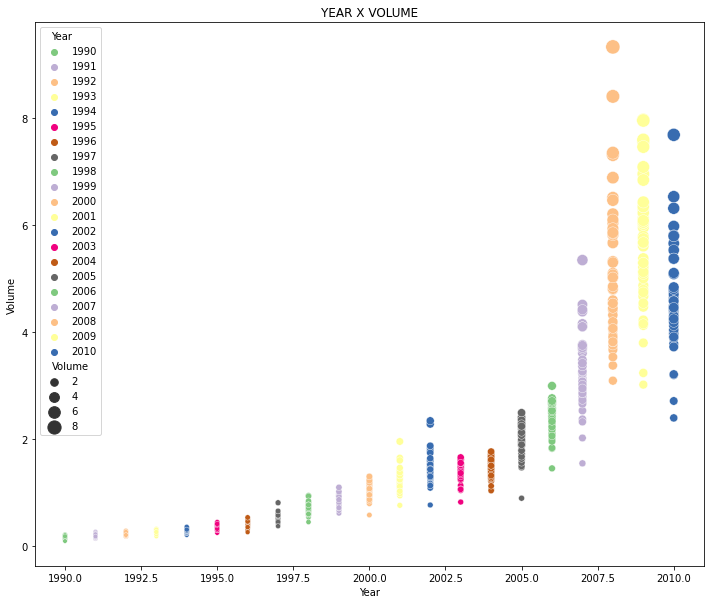

In [ ]:
#Scatter Plot of the Year and Volume
plt.figure(figsize=(12,10),facecolor='w')
plt.title("YEAR X VOLUME")
sns.scatterplot(data=weekly,x='Year',y='Volume',hue='Year',palette='Accent',size="Volume",sizes=(20,200))

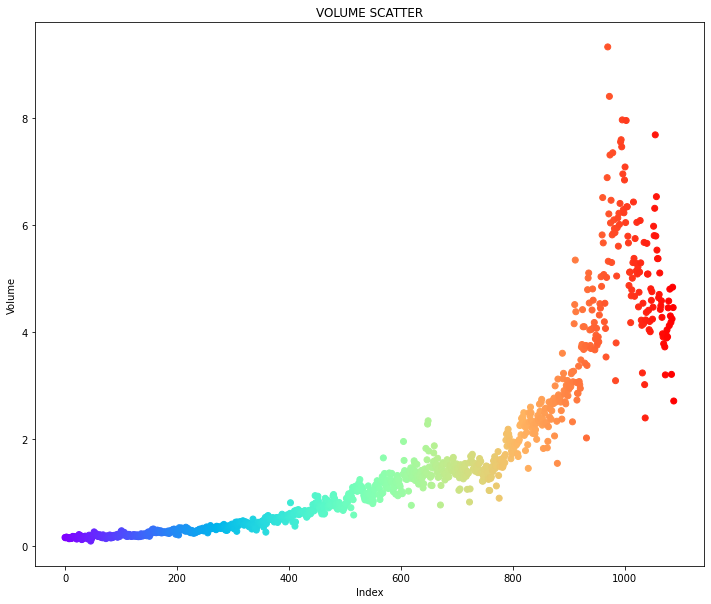

In [ ]:
#Scatter Plot of the Year and Volume
plt.figure(figsize=(12,10),facecolor='w')
plt.title("VOLUME SCATTER")
plt.scatter(weekly.index,weekly['Volume'],c=weekly.index,cmap='rainbow')
plt.xlabel("Index")
plt.ylabel("Volume")
plt.show()

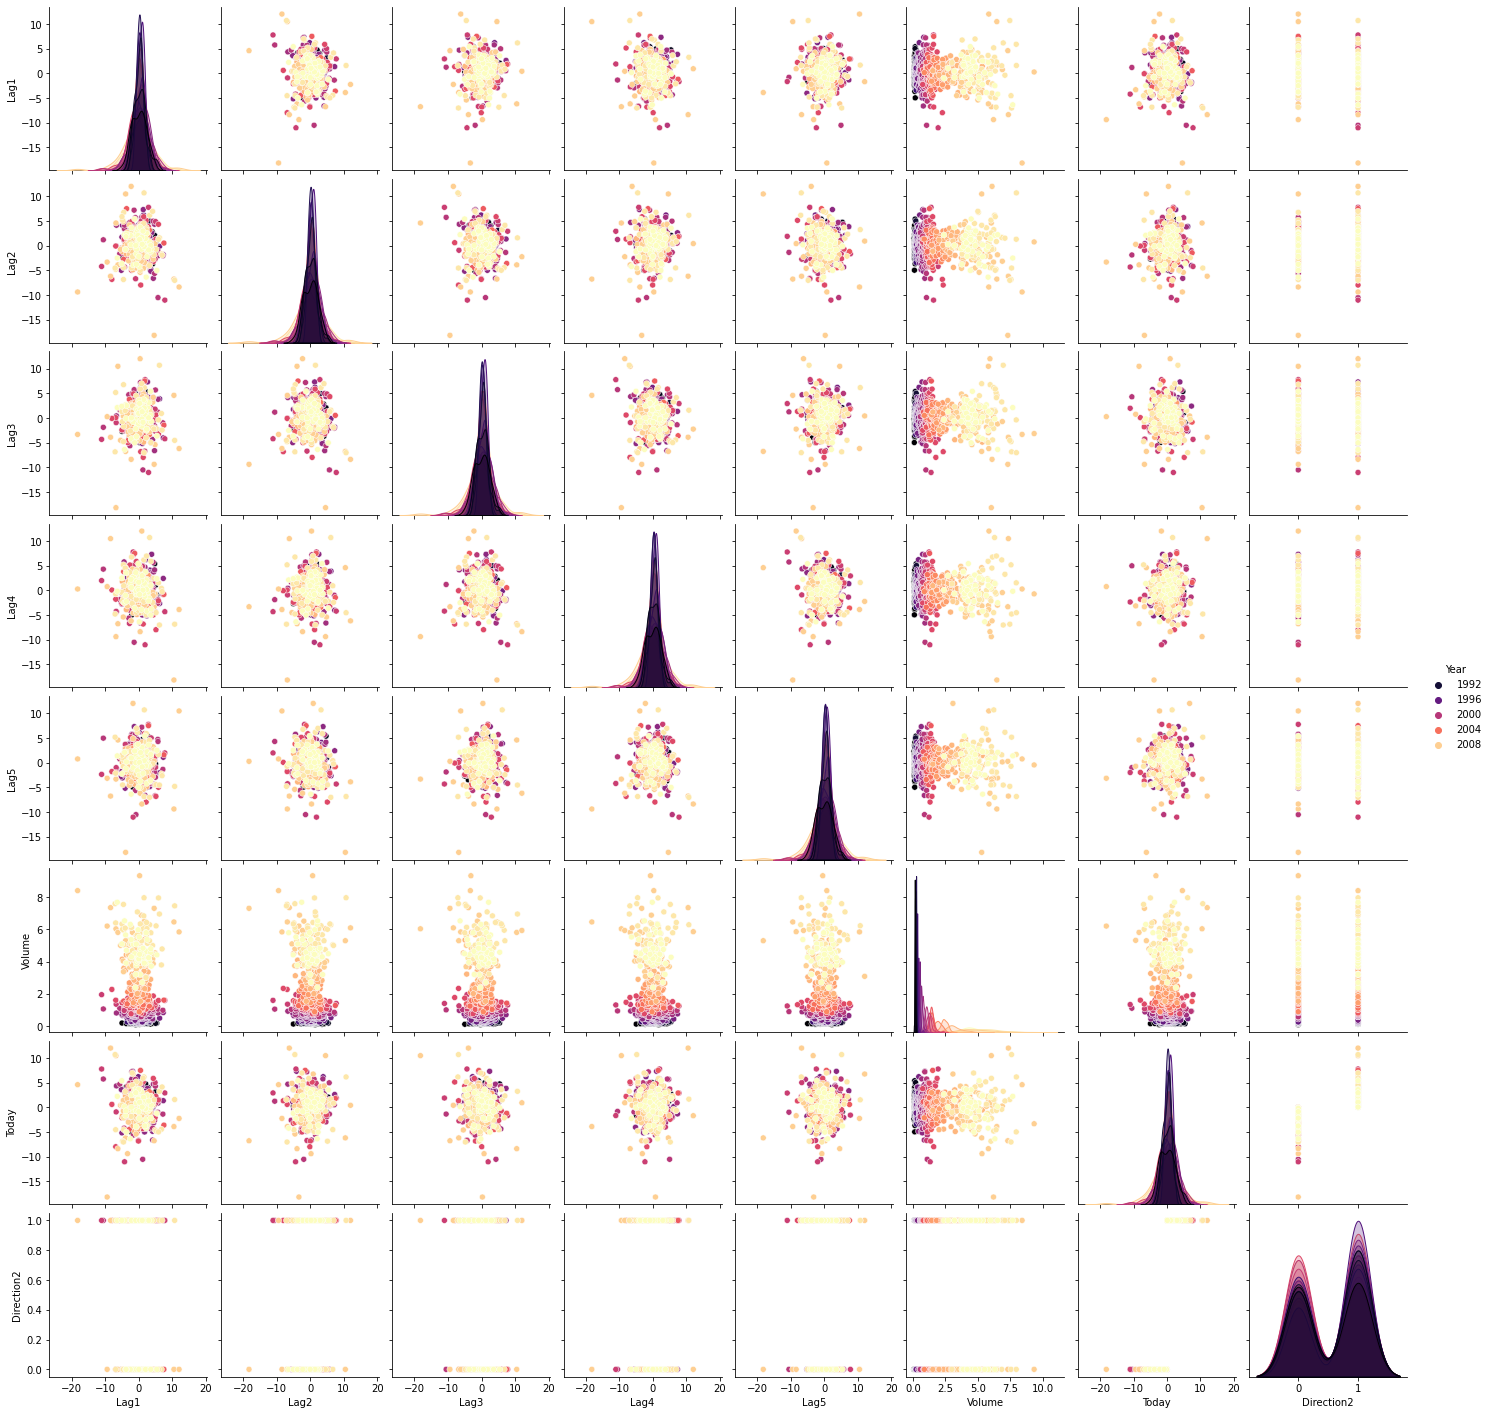

In [ ]:
#Pairplot of the Data Set
plt.rcParams['figure.facecolor']='white'
sns.pairplot(weekly,hue='Year',palette='magma')
plt.show()

**ANSWER**
> The pattern can be seen in between `Volume` and `Year` where the plot showed the color consistent color gradation which indicates that as time goes by, the amount of shares traded also higher. The rests are pretty much 

#####**(b) Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?**

In [ ]:
#Define the Predictors (X) and Response (Y)
X=weekly[['Lag1','Lag2','Lag3','Lag4','Lag5','Volume']]
Y=weekly.Direction2

In [ ]:
#Create the Model --> Logistic Regression using skl_lm
import sklearn.linear_model as skl_lm
reg=skl_lm.LogisticRegression()
reg.fit(X,Y)
print('Classes:',reg.classes_)
print('Coefficient:',reg.coef_)
print('Intercept:',reg.intercept_)

Classes: [0 1]
Coefficient: [[-0.04123854  0.05840384 -0.01605138 -0.02776243 -0.01446302 -0.02270963]]
Intercept: [0.26680422]


In [ ]:
#Summary Results
import statsmodels.formula.api as smf
logreg=smf.logit('Direction2~Lag1+Lag2+Lag3+Lag4+Lag5+Volume',data=weekly).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:             Direction2   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Tue, 10 Nov 2020   Pseudo R-squ.:                0.006580
Time:                        13:20:54   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

**ANSWER**
> As it is seen in the summary table above, the only predictor that has p-value less than 0.05 is Lag2 which means this predictor statistically significant. 

#####**(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

In [ ]:
#Confusion Matrix
logreg.pred_table().T

array([[ 54.,  48.],
       [430., 557.]])

In [ ]:
#Confusion Matrix
logreg_probs=logreg.predict()
logreg_pred=np.where(logreg_probs>0.5,'Up','Down')

conf_matrix=pd.crosstab(logreg_pred,weekly['Direction'],rownames=['Predicted'],colnames=['Actual'],margins=True)
conf_matrix

Actual,Down,Up,All
Predicted,,,
Down,54,48,102
Up,430,557,987
All,484,605,1089


In [ ]:
#What the Confusion Matrix tells us?
print("The Correct Prediction of 'Down' is:",conf_matrix.iloc[0,0],"over",conf_matrix.iloc[2,0],
      "which is",conf_matrix.iloc[0,0]/conf_matrix.iloc[2,0],"%")
print("The Correct Prediction of 'Up' is:",conf_matrix.iloc[1,1],"over",conf_matrix.iloc[2,1],
      "which is",conf_matrix.iloc[1,1]/conf_matrix.iloc[2,1],"%")
print("The Accuracy of the Overall Prediction is:",
      ((conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")
print("The Error Rate of the Overall Prediction is:",
      (1-(conf_matrix.iloc[0,0]+conf_matrix.iloc[1,1])/conf_matrix.iloc[2,2]),"%")

The Correct Prediction of 'Down' is: 54 over 484 which is 0.1115702479338843 %
The Correct Prediction of 'Up' is: 557 over 605 which is 0.9206611570247933 %
The Accuracy of the Overall Prediction is: 0.5610651974288338 %
The Error Rate of the Overall Prediction is: 0.43893480257116624 %


#####**(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).**

In [ ]:
#Create Train and Test Data
train=weekly.loc[weekly['Year']<2009]
test=weekly.loc[weekly['Year']>=2009]

In [ ]:
logreg=smf.logit('Direction2~Lag2',data=train).fit()

#Prediction Model of the Test Data
logreg_prob=logreg.predict(test)
logreg_pred=np.where(logreg_prob>0.5,'Up','Down') #The threshold

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4


In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(logreg_pred,test['Direction'],rownames=['Predicted'],colnames=['Actual'], margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_logreg=conf_matrix
conf_matrix_logreg

Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


In [ ]:
print("Accuracy of the Logistic Regression is:",accuracy,"%")
print("Error rate of the Logistic Regression is:",error_rate,"%")

Accuracy of the Logistic Regression is: 0.625 %
Error rate of the Logistic Regression is: 0.375 %


#####**(e) Repeat (d) using LDA.**

In [ ]:
#Import the Library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [ ]:
df=weekly.copy()

In [ ]:
df_train=df.loc[df['Year']<2009]
df_test=df.loc[df['Year']>=2009]

In [ ]:
#Create Train and Test Data for LDA
year_bool=df['Year']<2009
#Add 'Ones' column as SciKitLearn requires a 2-dimemsional array for fit() and predict()
df['Ones']=1 
x_train=df[year_bool][['Ones','Lag2']].values
x_test=df[~year_bool][['Ones','Lag2']].values
y_train=df[year_bool]['Direction'].values
y_test=df[~year_bool]['Direction'].values

In [ ]:
lda=LDA()
lda.fit(x_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred=lda.predict(x_test)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(lda_pred,test['Direction'],rownames=['Predicted'],colnames=['Actual'], margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_lda=conf_matrix
conf_matrix_lda

Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


In [ ]:
print("Accuracy of the LDA is:",accuracy,"%")
print("Error rate of the LDA is:",error_rate,"%")

Accuracy of the LDA is: 0.625 %
Error rate of the LDA is: 0.375 %


#####**(f) Repeat (d) using QDA.**

In [ ]:
#Import the Library
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
qda=QDA()
qda.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
qda_pred=qda.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


In [ ]:
conf_matrix_qda=pd.crosstab(qda_pred,df_test['Direction'], rownames=['Predicted'],colnames=['Actual'], margins=True)
conf_matrix_qda

Actual,Down,Up,All
Predicted,,,
Down,43,61,104
All,43,61,104


#####**(g) Repeat (d) using KNN with $K=1$**

In [ ]:
#Import the Library
from sklearn.neighbors import KNeighborsClassifier as KNNc

In [ ]:
neigh=KNNc(n_neighbors=1)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
knn_pred=neigh.predict(x_test)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(knn_pred,test['Direction'],rownames=['Predicted'],colnames=['Actual'], margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_knn=conf_matrix
conf_matrix_knn

Actual,Down,Up,All
Predicted,,,
Down,21,31,52
Up,22,30,52
All,43,61,104


In [ ]:
print("Accuracy of the KNN is:",accuracy,"%")
print("Error rate of the KNN is:",error_rate,"%")

Accuracy of the KNN is: 0.49038461538461536 %
Error rate of the KNN is: 0.5096153846153846 %


#####**(h) Which of these methods appears to provide the best results on this data?**

**ANSWER**
> From the models in point (d) Logistic Regression, (e) LDA, (f) QDA, and (g) KNN, the results of confusion matrix showed that Logistic Regression and LDA are the best model for prediction.

In [ ]:
#Confusion Matrix of Logistic Regression
conf_matrix_logreg

Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


In [ ]:
#Confusion Matrix of Linear Discriminant Analysis
conf_matrix_lda

Actual,Down,Up,All
Predicted,,,
Down,9,5,14
Up,34,56,90
All,43,61,104


In [ ]:
#Confusion Matrix of Quadratic Discriminant Analysis
conf_matrix_qda

Actual,Down,Up,All
Predicted,,,
Down,43,61,104
All,43,61,104


In [ ]:
#Confusion Matrix of K-Nearest Neighbor Classifier
conf_matrix_knn

Actual,Down,Up,All
Predicted,,,
Down,21,31,52
Up,22,30,52
All,43,61,104


#####**(i) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confusion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for $K$ in the KNN classifier.**

###**2. Problem No.11 Page 186-187 PDF (171-172 Physical Book): Auto Dataset**

In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

**Attributes:**
* `mpg` : meters per gallon
* `cylinders` : number of cylinders in the engine
* `displacement` : engine displacement
* `horsepower` : horsepower of the car
* `weight` : weight of the car (in lbs)
* `acceleration`: 	acceleration of the car (most likely (s) it took the car from 0-60)
* `year` : model year of the car
* `origin` : _unknown descriptor_ (probably related to area of the manufacturer)
* `name` : name of the car

#####**Processing the Dataset**
> **Notes**: When working on point (b) in the previous assignment, finding the predictors' range, it turned out that the statistics data of `horsepower` could not be shown, so the we add `na_values='?'` to indicate the NA (Not Available) data. 

In the section, I will retrive the data from the internet, from the link that is put in the cell below:

In [ ]:
#Importing the Data Set
auto_url="https://raw.githubusercontent.com/junyanyao/ISLR_Python/master/Dataset/Auto.csv"
auto=pd.read_csv(auto_url,na_values='?')
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
#Checking Missing Values
auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      5
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [ ]:
#Dropping out the Null
auto=auto.dropna()
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


#####**(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if `mpg` contains a value below its median. You can compute the median using the `median()` or in Python `numpy.median()` function. Note you may find it helpful to use the `data.frame()` or in Python `pandas.DataFrame()` funtion to create a single data set containing both `mpg01` and the other `Auto` variables.**

In [ ]:
#Create 'mpg01' column
auto['mpg01']=np.where(auto['mpg']>auto['mpg'].median(),1,0)
auto

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,1


#####**(b) Explore the data graphically in order to investigate the association between `mpg01` and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.**

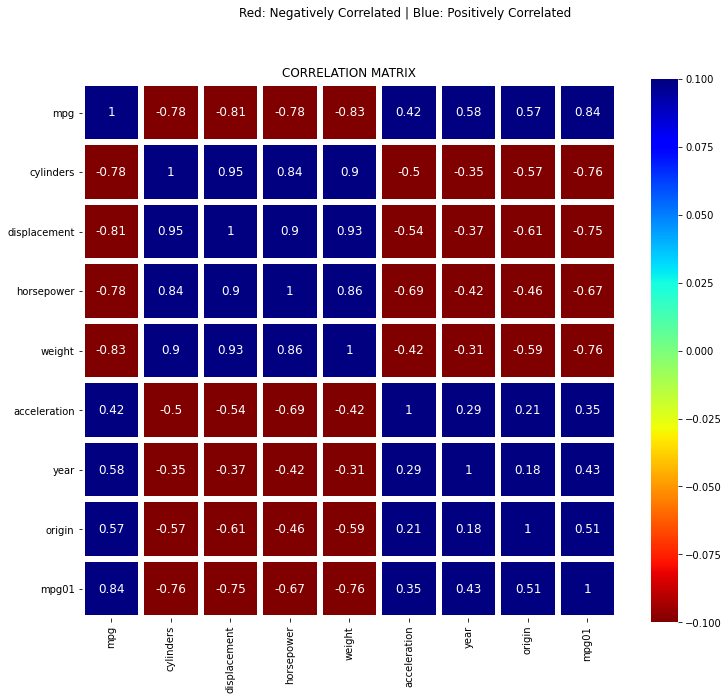

In [ ]:
#Correlation Matrix
autocorr=auto.corr()
plt.figure(figsize=(12,10),facecolor='w')
plt.title("CORRELATION MATRIX")
plt.suptitle("Red: Negatively Correlated | Blue: Positively Correlated")
sns.heatmap(autocorr[(autocorr>=0)|(autocorr<=-0)], 
            cmap='jet_r',vmax=0.1,vmin=-0.1,linewidths=5,
            annot=True,annot_kws={"size":12},square=True);

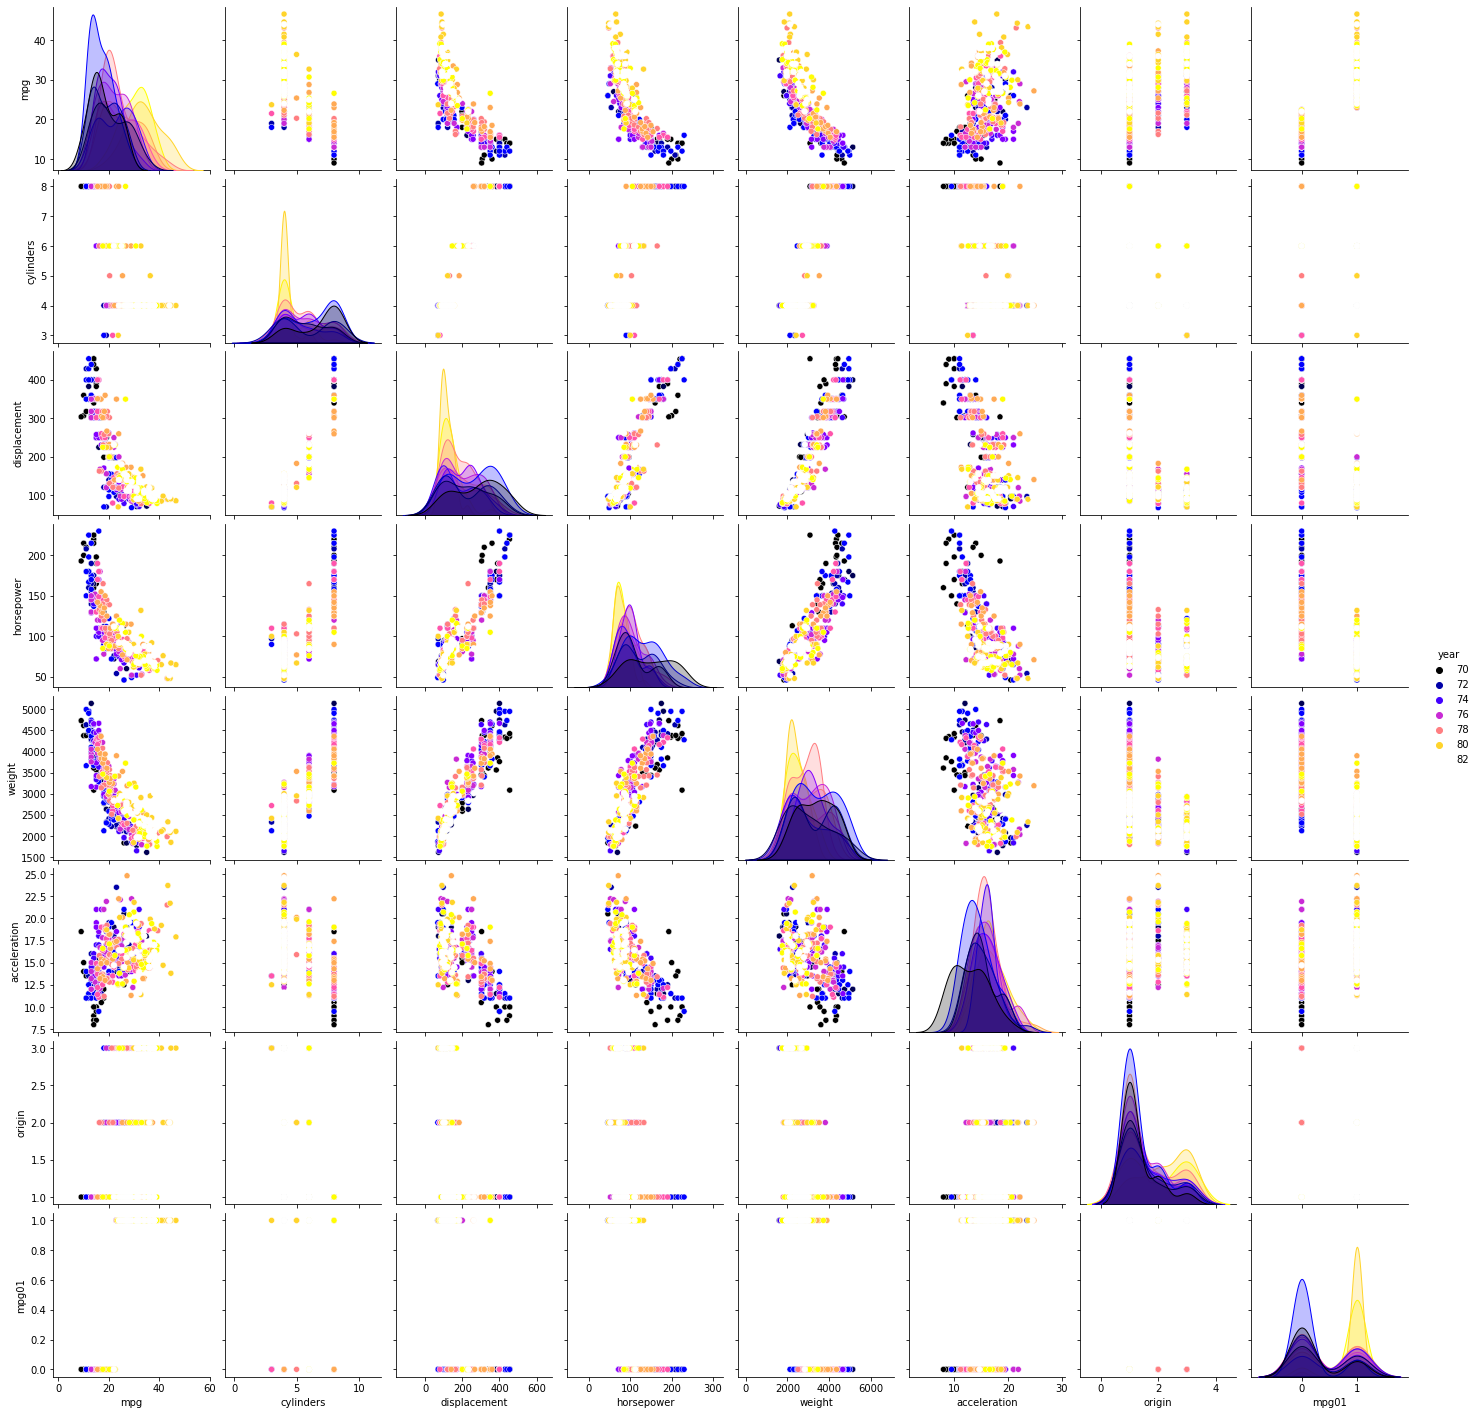

In [ ]:
#Pairplot of the Data Set
plt.rcParams['figure.facecolor']='white'
sns.pairplot(auto,hue='year',palette='gnuplot2')
plt.show()

**ANSWER**
> `mpg01` seems have strong negative correlation with `cylinders`, `displacement`, `horsepower`, and `weight`. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


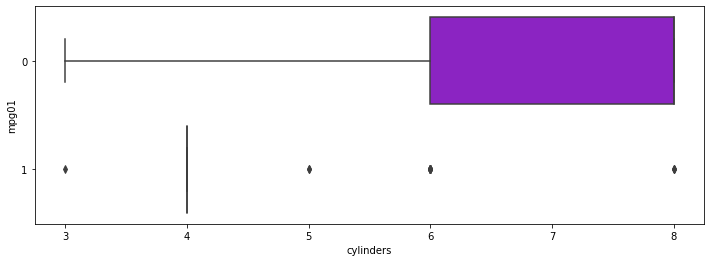

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


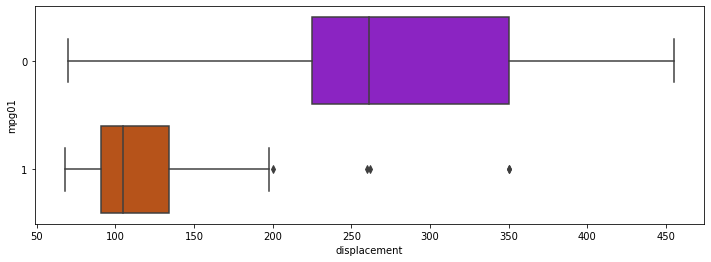

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


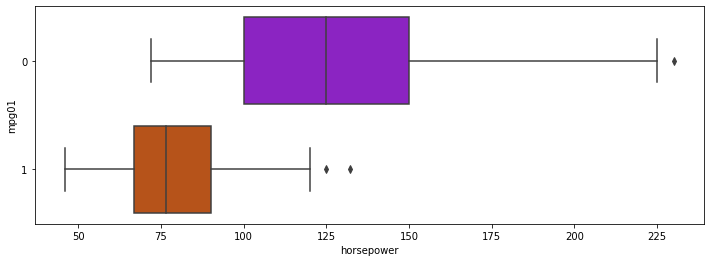

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


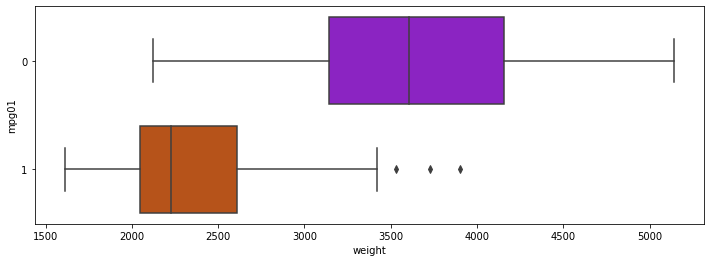

In [ ]:
#Horizontal Boxplot 'mpg01' with the Most Correlated Predictors
x=auto[['cylinders','displacement','horsepower','weight']].columns
for i in x:
  plt.figure(figsize=(12,4),facecolor='w')
  sns.boxplot(i,auto['mpg01'],data=auto,orient="h",palette="gnuplot")
  plt.show()

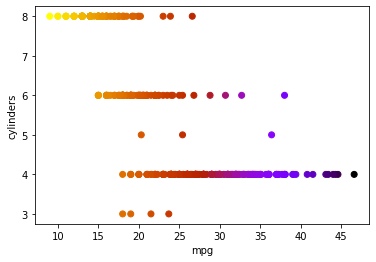

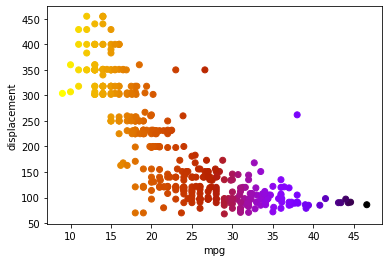

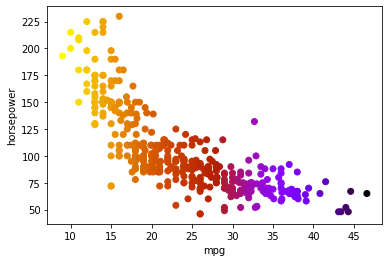

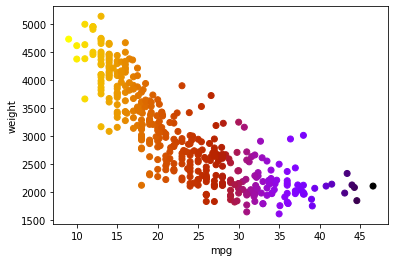

In [ ]:
#Scatterplot 'mpg01' with the Most Correlated Predictors
x=auto[['cylinders','displacement','horsepower','weight']].columns
for i in x:
  plt.figure(figsize=(6,4),facecolor='w')
  #plt.title(str(i),"Scatterplot")
  plt.scatter(auto['mpg'],auto[i],c=auto['mpg'],cmap='gnuplot_r')
  plt.xlabel("mpg")
  plt.ylabel(str(i))
  plt.show()

#####**(c) Split the data into a training set and a test set.**

In [ ]:
#Import train_test_split library
from sklearn.model_selection import train_test_split

In [ ]:
X=auto[['cylinders','displacement','horsepower','weight']].values
y=auto['mpg01'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)

In [ ]:
print("The Predictors:",X.shape)
print("The Response:",y.shape)
print("The Train Split of Predictors:",X_train.shape)
print("The Test Split of Predictors:",X_test.shape)
print("The Train Split of Response:",y_train.shape)
print("The Test Split of Response:",y_test.shape)

The Predictors: (392, 4)
The Response: (392,)
The Train Split of Predictors: (294, 4)
The Test Split of Predictors: (98, 4)
The Train Split of Response: (294,)
The Test Split of Response: (98,)


#####**(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?**

In [ ]:
lda=LDA()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
lda_pred=lda.predict(X_test)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(lda_pred,y_test,rownames=['Predicted'],colnames=['Actual'],margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_lda=conf_matrix
conf_matrix_lda

Actual,0,1,All
Predicted,,,
0,49,2,51
1,5,42,47
All,54,44,98


In [ ]:
print("Accuracy of the LDA is:",accuracy,"%")
print("Error rate of the LDA is:",error_rate,"%")

Accuracy of the LDA is: 0.9285714285714286 %
Error rate of the LDA is: 0.07142857142857142 %


#####**(e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?**

In [ ]:
qda=QDA()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
qda_pred=qda.predict(X_test)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(qda_pred,y_test,rownames=['Predicted'],colnames=['Actual'],margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_qda=conf_matrix
conf_matrix_qda

Actual,0,1,All
Predicted,,,
0,52,4,56
1,2,40,42
All,54,44,98


In [ ]:
print("Accuracy of the QDA is:",accuracy,"%")
print("Error rate of the QDA is:",error_rate,"%")

Accuracy of the QDA is: 0.9387755102040817 %
Error rate of the QDA is: 0.061224489795918366 %


#####**(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
logreg_pred=logreg.predict(X_test)

In [ ]:
#Confusion Matrix
conf_matrix=pd.crosstab(logreg_pred,y_test,rownames=['Predicted'],colnames=['Actual'],margins=True)

tn=conf_matrix.iloc[0,0]
tp=conf_matrix.iloc[1,1]
fn=conf_matrix.iloc[0,1]
fp=conf_matrix.iloc[1,0]
all=conf_matrix.iloc[2,2]
accuracy=(tp+tn)/all
error_rate=(fp+fn)/all

conf_matrix_logreg=conf_matrix
conf_matrix_logreg

Actual,0,1,All
Predicted,,,
0,50,4,54
1,4,40,44
All,54,44,98


In [ ]:
print("Accuracy of the Logistic Regression is:",accuracy,"%")
print("Error rate of the Logistic Regression is:",error_rate,"%")

Accuracy of the Logistic Regression is: 0.9183673469387755 %
Error rate of the Logistic Regression is: 0.08163265306122448 %


#####**(g) Perform KNN on the training data, with several values of $K$, in order to predict `mpg01`. Use the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of $K$ seems to perform the best on this data set?**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
accuracy=[]
for i in range(1, 51):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    pred_i = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,clf.predict(X_test)))
    #print(accuracy)

Text(0, 0.5, 'Accuracy')

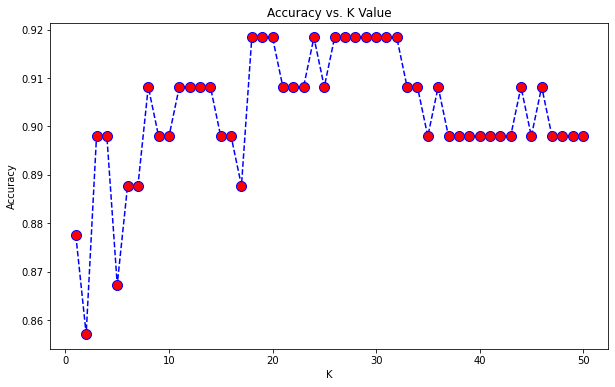

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,51),accuracy,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title("Accuracy vs. K Value")
plt.xlabel("K")
plt.ylabel("Accuracy")

**ANSWER**
> As we see in the visualization of Elbow Method above, we can see that the best accuracy is when K=18

In [ ]:
error_rate = []
# Will take some time
for i in range(1,50):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

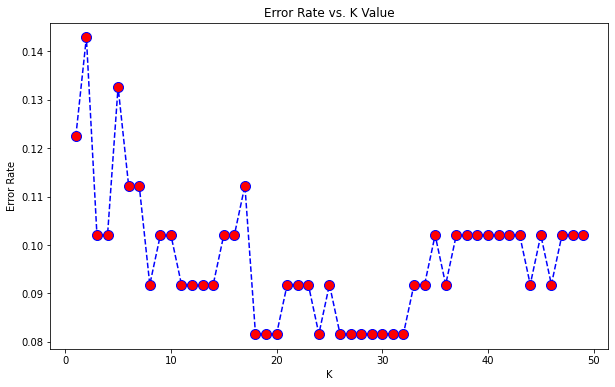

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

**ANSWER**
> As we see in the visualization of Elbow Method above, we can see that the least error rate is when K=18
